In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

gridsize=100

In [32]:
# make a whole lot of data covering a grid
temp = np.linspace(-1, 1, gridsize)
grid = np.array([[temp[i], temp[j]] 
                 for i in range(gridsize) 
                 for j in range(gridsize)])
colours = np.array([[i, j, 0] 
                    for i in range(gridsize) 
                    for j in range(gridsize)]).astype(np.float32)
colours /= gridsize

input_indices = np.array([0,
                          gridsize**2 - 1,
                          gridsize-1,
                          gridsize**2 -gridsize])
target_data = np.array([0.0, 0.0, 1.0, 1.0])

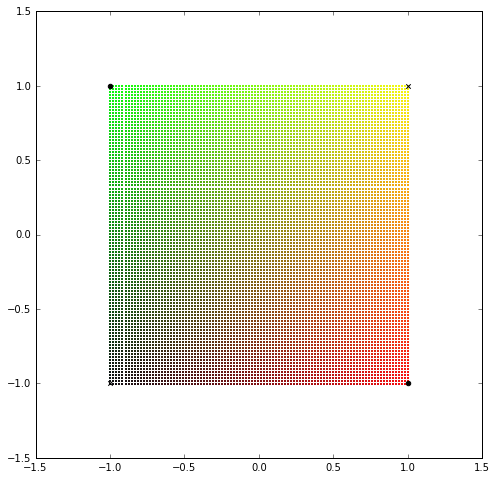

In [33]:
def plot_grid(data, colours=colours):
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    plt.scatter(data[:, 0], data[:, 1], marker=',', s=1, edgecolors=colours)
    train_data = data[input_indices, :]
    num_train = train_data.shape[0]
    negatives = train_data[:num_train//2]
    positives = train_data[num_train//2:]
    plt.scatter(negatives[:, 0], negatives[:, 1], marker='x', c=[[0,0,0]])
    plt.scatter(positives[:, 0], positives[:, 1], marker='o', c=[[0,0,0]])
    #plt.xlim((-1, 1))
    #plt.ylim((-1, 1))
    ax.set_aspect('equal')
    plt.show()
plot_grid(grid)

In [34]:
def affine(input_var, new_size, scope=None):
    with tf.variable_scope(scope or 'affine'):
        input_size = input_var.get_shape()[1].value
        weights = tf.get_variable('weights', [input_size, new_size])
        bias = tf.get_variable('bias', [new_size])
        return tf.nn.bias_add(tf.matmul(input_var, weights), bias)

In [35]:
tf.reset_default_graph()

input_pl = tf.placeholder(tf.float32, [None, 2])
target_pl = tf.placeholder(tf.float32, [None])

with tf.variable_scope('model'):
    hidden_units = tf.nn.relu(affine(input_pl, 2, 'input'))
    output = affine(hidden_units, 1, 'output')
    
    loss = tf.nn.sigmoid_cross_entropy_with_logits(
        tf.squeeze(output), target_pl)
    loss = tf.reduce_mean(loss)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

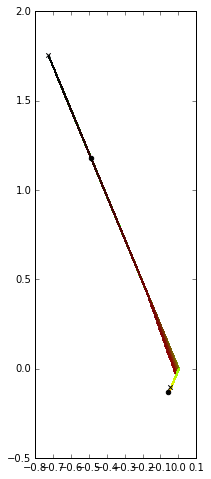

In [36]:
# now let's pass it through a rectifier layer
weights = np.random.normal(size=(2, 2), scale=1/np.sqrt(2))
bias = np.zeros((2,))
activations = np.dot(grid, weights) + bias
activations = np.maximum(activations, 0)
weights = np.random.normal(size=(2, 2), scale=1/np.sqrt(2))
bias = np.zeros((2,))
activations = np.dot(activations, weights) + bias

plot_grid(activations)